# This Notebook contains the following:

1. **Importing Libraries**
2. **Importing Dataset**
3. **Considering Security Implications**
4. **Exploring Customer Behavior in Different Geographic Areas**
   1. Creating a “region” column based on the “state” column from the customers dataset.
   2. Determining whether there’s a difference in spending habits between the different U.S. regions.
5. **Creating an Exclusion Flag for Low-Activity Customers**
6. **Creating a Profiling Variable**
   1. **Customer Profiling Based on Age**
      1. Creating a new column 'age_group'.
      2. Creating a Pie Chart of Age Groups.
   2. **Customer Profiling Based on Income**
      1. Defining the intervals of the groups.
      2. Creating a Pie Chart of Income Groups.
   3. **Customer Profiling Based on Number of Dependents**
      1. Defining the intervals of the groups.
      2. Creating a Bar Chart of Dependents.
   4. **Customer Profiling Based on Family Status**
      1. Defining the intervals of the groups.
      2. Creating a Pie Chart of Family Status.
7. **Comparing Customer Profiles with Departments**
   1. Income Groups’ Behaviors Across Departments.
8. **Comparing Customer Profiles with Regions**
   1. Income Groups.
   2. Age Groups.
   3. Department Groups.
   4. Dependents.
9. **Aggregating Max, Mean, and Min Variables on a Customer-Profile Level for Usage Frequency and Expenditure**
   1. Aggregations by Age Group.
   2. Aggregations by Income Group.
   3. Aggregations by Dependents Category.gations by Dependants Category

# 1. Importing libraries 

In [4]:
#Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing dataset 

In [6]:
# Project folder path 
path = r'C:\Users\hp\08-2024 Instacart Basket Analysis'
# Import customers merged dataset
df = pd.read_pickle(os.path.join(path,'Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))
#Import departments dataset 

df_dep = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [7]:
#Checking df shape : 
df.shape 

(32404161, 33)

In [8]:
df.columns 

Index(['user_id', 'First_Name', 'Last_Name', 'Gender', 'State', 'Age',
       'Date_Joined', 'Number_of_Dependents', 'Family Status', 'Income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest day', 'busiest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'Customer_frequency', 'frequency_flag', '_merge'],
      dtype='object')

# 3. Considering any security implications that might exist for this new data.

*We must give particular attention to any Personally Identifiable Information (PII), including names, email addresses, physical addresses, and phone numbers.*

*In our dataset, customer names were present; however, since they are classified as PII,* **I will completely remove both First_Name and Last_Name to eliminate any risk of direct identification. This step is crucial to maintaining data privacy and security.**

*Other PII elements in the dataset include Sex, State, Age, Date_Joined, and Marital_Status*

In [11]:
# Removing First and Last names: 
df_final = df.drop(columns=['First_Name', 'Last_Name'])

In [12]:
#Checking 
df_final.head()

,user_id,Gender,State,Age,Date_Joined,Number_of_Dependents,Family Status,Income,product_id,product_name,...,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both


# 4. Exploring customer behavior in different geographic areas

*The Instacart officers are interested in comparing customer behavior in different geographic areas. We will create a regional segmentation of the data. We'll need to create a “Region” column based on the “State” column from the customers data set.*

## 4.1 Creating a “region” column based on the “state” column from the customers data set.

In [16]:
# Understanding the distribution of the data across different states.
df_final['State'].value_counts(dropna = False)

State
Pennsylvania            667077
California              659780
Rhode Island            656892
Georgia                 656376
New Mexico              654479
Arizona                 653948
North Carolina          651890
Oklahoma                651722
Alaska                  648490
Minnesota               647796
Massachusetts           646355
Wyoming                 644249
Virginia                641409
Missouri                640715
Texas                   640394
Colorado                639260
Maine                   638577
North Dakota            638489
Alabama                 637975
Kansas                  637507
Louisiana               637460
Delaware                637007
South Carolina          636734
Oregon                  636412
Nevada                  636134
Arkansas                636127
New York                635977
Montana                 635260
South Dakota            633731
Illinois                633017
Hawaii                  632884
Washington              632841
Mi

In [17]:
# Create new column for region, using 'If-Statements with For-Loops'
result =[]

for value in df_final['State']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append('West')
    else:
        result.append('Unknown')

In [18]:
#Checking 
result 

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 

In [19]:
# Create new column from result output
df_final['Region'] = result

In [20]:
# Check accurate regional segmentation
df_final['Region'].value_counts (dropna = False)

Region
South        10791640
West          8292785
Midwest       7597106
Northeast     5722630
Name: count, dtype: int64

In [21]:
# Checking the shape dataframe
df_final.shape

(32404161, 32)

In [22]:
# Check on the dataframe
df_final.head()

,user_id,Gender,State,Age,Date_Joined,Number_of_Dependents,Family Status,Income,product_id,product_name,...,busiest days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,_merge,Region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Slowest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest


## 4.2 Determining whether there’s a difference in spending habits between the different U.S. regions.

In [24]:
#Crossing 'Region' with the 'spender flag'.
regional_spending_habits = pd.crosstab(df_final['Region'], df_final['spender_flag'], dropna = False)

In [25]:
#Output
regional_spending_habits

spender_flag,High_spender,Low_spender
Region,,
Midwest,140192,7456914
Northeast,98797,5623833
South,189696,10601944
West,148106,8144679


*Data showing the number of high and low spenders across different U.S. regions*


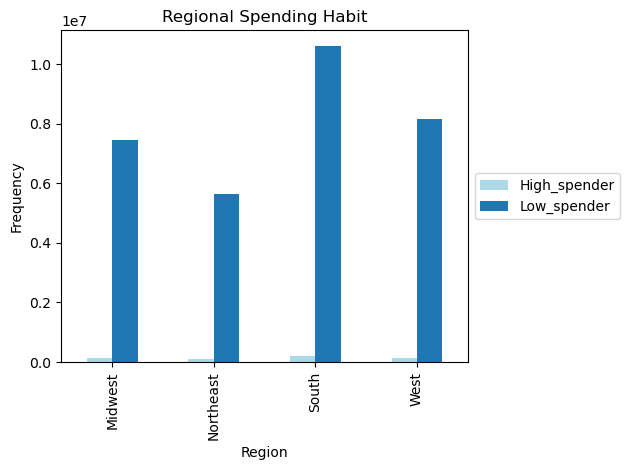

In [27]:
# Creating a bar chart of the above 'regional_spending_habits' crosstab

bar_regional_spending_habit=regional_spending_habits.plot.bar(color=['lightblue','tab:blue'])
plt.xlabel("Region", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Regional Spending Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters

#### Insights: 
*It seems that customers' spending habits, especially distinguishing between high and low spenders, do not exhibit significant variations between different regions. In each region, the number of low spenders aligns with the total number of customers, with the regions ranked as South, West, Midwest, and Northeast. Furthermore, there are no notable differences in the counts of high spenders across these regions.*

In [29]:
# Export the chart
bar_regional_spending_habit.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_regional_spending_habit.png'))

# 5. Creating an exclusion flag for low-activity customers (customers with less than 5 orders) 

*The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.*

In [32]:
# Deriving columns with loc() active customers
df_final.loc[df_final['max_order'] >= 5, 'customer_activity'] = 'active_customer'

In [33]:
# Deriving columns with loc() non-active customers
df_final.loc[df_final['max_order'] < 5, 'customer_activity'] = 'non_active_customer'

In [34]:
# Checking the result
df_final['customer_activity'].value_counts(dropna = False)

customer_activity
active_customer        30963910
non_active_customer     1440251
Name: count, dtype: int64

*Total sum = 32404161 rows --> New column added correctly*

In [36]:
# Create a subset for the active customers
df_active = df_final[df_final['customer_activity']=='active_customer']

In [37]:
df_active.head()

,user_id,Gender,State,Age,Date_Joined,Number_of_Dependents,Family Status,Income,product_id,product_name,...,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,_merge,Region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer


In [38]:
df_active.shape

(30963910, 33)

In [39]:
# Export the 'active_customer' subset
df_active.to_pickle(os.path.join(path,'Data','Prepared Data','ords_prods_active_customers.pkl'))

# 6. Creating a profiling variable

*The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns*

## 6.1. Customer profiling based on age:

### 6.1.1 Creating a new column 'age_group'

We could create Age group into 4 categories: 
Conditions
1. if age is in between 0 to 17 then group as Kids
2. if age is in between 18 to 29 then group as Young adults
3. if age is in between 30 to 40 then group as Adults
4. if age is in between 41 to 50 then group as Middle age
5. if age is in between 51 to 64 then group as Old people
6. if age is 65 and above then group as Senior

In [45]:
# Deriving columns with loc(), create a flag 'age group'
df_active.loc[df_active['Age'] < 18, 'age_group'] = 'Kids'
df_active.loc[(df_active['Age'] >= 18) & (df_active['Age'] < 29),'age_group']= 'Young adults'
df_active.loc[(df_active['Age'] >= 30) & (df_active['Age'] < 40),'age_group']= 'Adults'
df_active.loc[(df_active['Age'] >= 41) & (df_active['Age'] < 50),'age_group']= 'Middle age'
df_active.loc[(df_active['Age'] >= 51) & (df_active['Age'] < 64),'age_group']= 'Old people'
df_active.loc[df_active['Age'] > 65, 'age_group'] = 'Senior'
# Cross-check the result
df_active['age_group'].value_counts(dropna=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_17504\983940198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['Age'] < 18, 'age_group'] = 'Kids'


age_group
Senior          7730680
Old people      6246990
Young adults    5320180
Adults          4847396
Middle age      4399755
NaN             2418909
Name: count, dtype: int64

*Total sum = 32404161 rows --> New column added correctly*

In [47]:
df_active.head()

,user_id,Gender,State,Age,Date_Joined,Number_of_Dependents,Family Status,Income,product_id,product_name,...,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,_merge,Region,customer_activity,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age


### 6.1.2 Creating a Pie Chart of Age Groups

Text(0.5, 1.0, 'Profiling variable based on age groups')

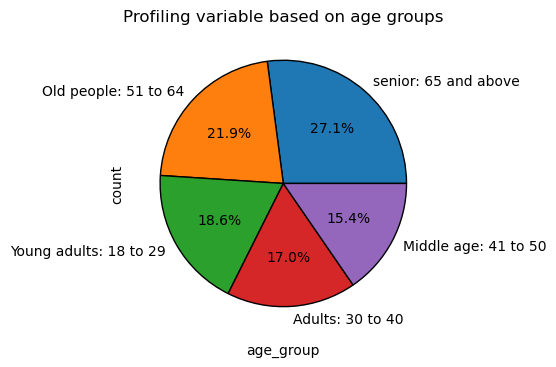

In [49]:
age_group_counts = df_active['age_group'].value_counts()

# Plot the pie chart
age_group_counts.plot(figsize=(4,4))
age_group_pie_chart = age_group_counts.plot.pie(
    labels=['senior: 65 and above','Old people: 51 to 64','Young adults: 18 to 29','Adults: 30 to 40', 'Middle age: 41 to 50'],
    autopct='%.1f%%',
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Profiling variable based on age groups', fontsize=12)

**Insights:**
*To create relevant marketing strategies based on the age profiling shown in the pie chart, we can extract some key insights for Instacart’s marketing and business strategy units.*

**Seniors (65 and above) form the largest segment (26.5%):**

*This group represents a significant portion of the customer base.*
* Focus on products and services tailored to seniors, such as health-related products (vitamins, supplements), home-delivery services, and ease of use.
* Marketing strategies should emphasize health, wellness, and convenience.

**Old people (51 to 64), the second-largest group (21.8%):**

*This age group might be approaching retirement, with a potential focus on managing health and lifestyle changes.*
* Highlight products like low-calorie, heart-healthy food options, and supplements.
* Marketing should target both personal wellness and family-oriented purchases, possibly assisting elderly parents or grown children.
  
**Young adults (18 to 29) (18.8%) and Adults (30 to 40) (17.2%) together account for over a third of the population:**

*These groups may prioritize convenience, affordability, and trendy or quick-to-prepare foods.*
* Digital marketing campaigns should focus on promotions for time-saving solutions, meal kits, and eco-friendly, organic products.
* Engagement through social media and app-based interactions could be effective.
  
**Middle age (41 to 50) group is the smallest segment (15.7%):**

*This group might be balancing work, family, and personal health.*
* Products like nutritious meals for families, personal care, and home essentials may resonate.
* Marketing should focus on ease of preparation, family-oriented bundles, and self-care products for stress management.

In [51]:
#Exporting the visualization 
age_group_pie_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Pie_chart_age_4.10.png'))

## 6.2. Customer profiling based on income

### 6.2.1 Defining the intervals of the groups

In [54]:
# We've created already the column 'spender_flag'
df_active['spender_flag'].value_counts()

spender_flag
Low_spender     30416630
High_spender      547280
Name: count, dtype: int64

### 6.2.2 Creating a Pie Chart of spender flag

Text(0.5, 1.0, 'Profiling variable based on income')

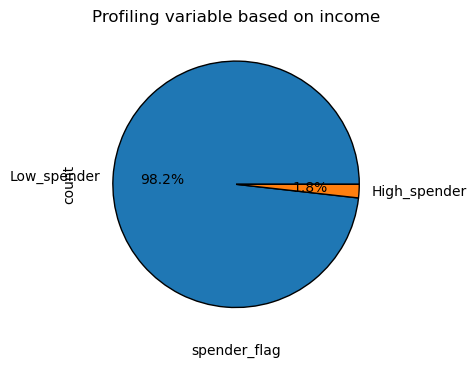

In [56]:
income_profiling = df_active['spender_flag'].value_counts()

# Plot the pie chart
income_profiling.plot(figsize=(4,4))
income_pie_chart = income_profiling.plot.pie(
    labels=['Low_spender','High_spender'],
    autopct='%.1f%%',
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Profiling variable based on income', fontsize=12)

In [57]:
#Exporting the visualization 
income_pie_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Pie_chart_income_4.10.png'))

**Insights:**  
*Here are some insights based on the chart and data:*

**Majority are Low Spenders:** The "Low_spender" group significantly dominates, with over 30 million entries compared to just around 547,000 in the "High_spender" group. This suggests that most users fall into the low-spending category.

**High Spenders are a Small Proportion:** High spenders make up only a small fraction (about 1.77%) of the total population. Despite their smaller size, these users may contribute more value per individual, depending on the business model.

* Potential for Targeting: Given the large number of low spenders, there could be potential to increase revenue by encouraging more spending from this group. Alternatively, focusing on the high spenders may yield greater returns per user.



## 6.3. Customer profiling based on Number of dependents

### 6.3.1 Defining the intervals of the groups

In [61]:
df_active['Number_of_Dependents'].describe()

count    3.096391e+07
mean     1.501820e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Number_of_Dependents, dtype: float64

In [62]:
# creating small dependent group
df_active.loc[df_active['Number_of_Dependents']<=1,'dependants_group']='Small'

# creating medium dependant group
df_active.loc[df_active['Number_of_Dependents']==2,'dependants_group']='Medium'

# creating large family dependent group
df_active.loc[df_active['Number_of_Dependents']>=3,'dependants_group']='Large'

df_active['dependants_group'].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_17504\3619178905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['Number_of_Dependents']<=1,'dependants_group']='Small'


dependants_group
Small     15458462
Large      7772362
Medium     7733086
Name: count, dtype: int64

In [63]:
df_active.head()

,user_id,Gender,State,Age,Date_Joined,Number_of_Dependents,Family Status,Income,product_id,product_name,...,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,_merge,Region,customer_activity,age_group,dependants_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age,Large
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age,Large
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age,Large
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age,Large
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age,Large


### 6.3.2 Creating a bart chart

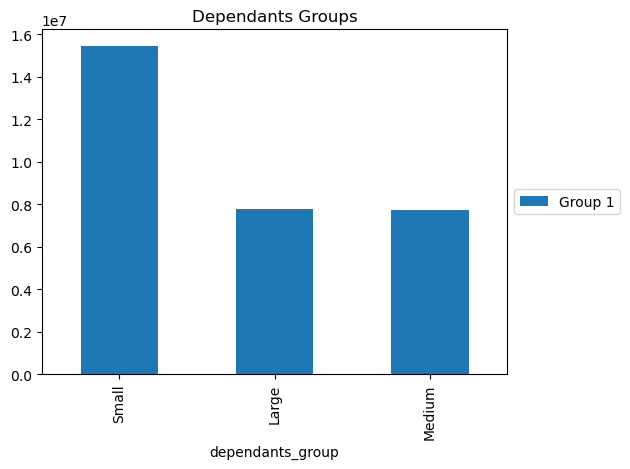

In [65]:
# Creating a bar chart of the above 'dependants_group'
dependants_groups = df_active['dependants_group'].value_counts().plot.bar()

# Add title and labels
plt.title("Dependants Groups", fontsize=12)

# Ensure legend appears, check if labels are passed in
plt.legend(['Group 1', 'Group 2'], loc='center left', bbox_to_anchor=(1.0, 0.5))

# Automatically adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [66]:
#Exporting the visualization 
dependants_groups.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Bar_chart_dependants_4.10.png'))

## 6.4. Customer profiling based on Family Status 

### 6.4.1 Defining the intervals of the groups

In [69]:
# Define the intervals of the groups
df_active['Family Status'].value_counts(dropna=False)

Family Status
married                             21743264
single                               5094262
divorced/widowed                     2645232
living with parents and siblings     1481152
Name: count, dtype: int64

### 6.4.2 Creating a Pie Chart of spender flag

Text(0.5, 1.0, 'Profiling variable based on Family Status')

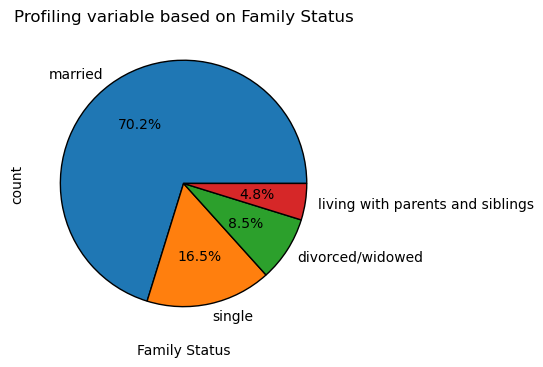

In [71]:
family_profiling = df_active['Family Status'].value_counts()

# Plot the pie chart
family_profiling.plot(figsize=(4,4))
family_pie_chart = family_profiling.plot.pie(
    labels=['married','single','divorced/widowed','living with parents and siblings'],
    autopct='%.1f%%',
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Profiling variable based on Family Status', fontsize=12)

In [72]:
#Exporting the visualization 
family_pie_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'family_pie_chart_4.10.png'))

# 7.Compare customer profiles with departments

In [147]:
df_active.columns

Index(['user_id', 'Gender', 'State', 'Age', 'Date_Joined',
       'Number_of_Dependents', 'Family Status', 'Income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest day', 'busiest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'Customer_frequency', 'frequency_flag', '_merge',
       'Region', 'customer_activity', 'age_group', 'dependants_group'],
      dtype='object')

In [262]:
#Rename column 'Unnamed: 0' to 'department_id'

df_dep.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [268]:
# Turning department dataframe into data dictionary
zipped = zip (df_dep['department_id'], df_dep['department'])
data_dict = dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [274]:
# Connect department names to department_id in dataframe

df_active.loc[:, 'department'] = df_active['department_id'].map(data_dict)

In [278]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)
# Checking dataframe

df_active.head()

,user_id,Gender,State,Age,Date_Joined,Number_of_Dependents,Family Status,Income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,_merge,Region,customer_activity,age_group,dependants_group,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age,Large,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age,Large,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age,Large,beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age,Large,produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,3,3,11,30.0,2,1,Low-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,both,Midwest,active_customer,Middle age,Large,produce


TypeError: 'Text' object is not callable

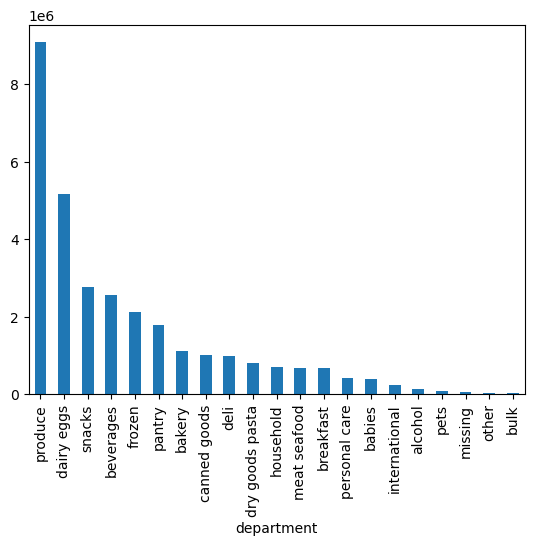

In [282]:
# Create bar chart of department orders
department_bar = df_active['department'].value_counts().plot.bar(color='tab:blue')
plt.title('Total Orders by Department')
plt.tight_layout()
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.tight_layout()  # Automatically adjust subplot parameters

#### Insights: 
*The leading departments on Instacart are Produce, Dairy & Eggs, Snacks, Beverages, and Frozen. Notably, Produce and Dairy & Eggs have the highest order volumes. Focusing on these two departments could significantly increase sales. Additionally, examining customer demographics for each department could help in developing targeted advertising strategies to further drive sales growth.*

In [285]:
# Exporting the chart
department_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'orders_by_department_bar.png'))

## 7.1 Income Groups Behaviors across Departments

In [293]:
# Create crosstab of 'income_group' data with 'department'
crosstab_income_department=pd.crosstab(df_active['department'],df_active['spender_flag'],dropna=False)

In [295]:
crosstab_income_department

spender_flag,High_spender,Low_spender
department,,
alcohol,12084,132543
babies,3822,406570
bakery,25318,1095510
beverages,52826,2519075
breakfast,12917,657933
bulk,98,33353
canned goods,18568,993506
dairy eggs,99159,5077369
deli,15437,988397


AttributeError: 'Axes' object has no attribute 'xlabel'

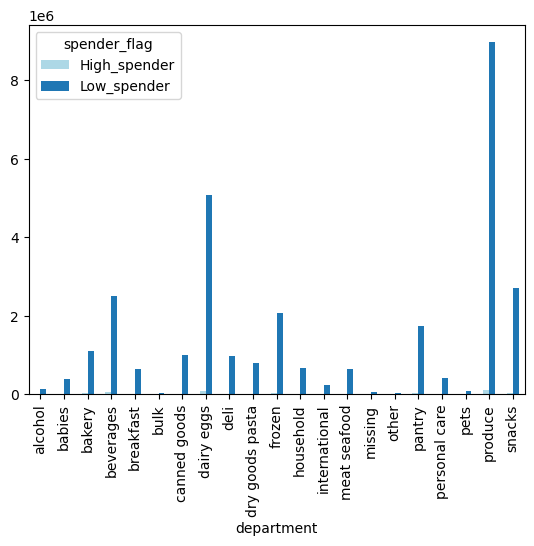

In [297]:
# Create a bar chart of the above crosstab_income_department
bar_crosstab_income_department=crosstab_income_department.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel("", fontsize=10)
plt.ylabel(" Frequency ",fontsize=10)
plt.title("Income Groups Behaviors across Department", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters

In [299]:
# Exporting the chart
bar_crosstab_income_department.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'crosstab_income_department.png'))

# 8.Compare customer profiles with regions

## 8.1. Income Groups

AttributeError: 'Axes' object has no attribute 'gca'

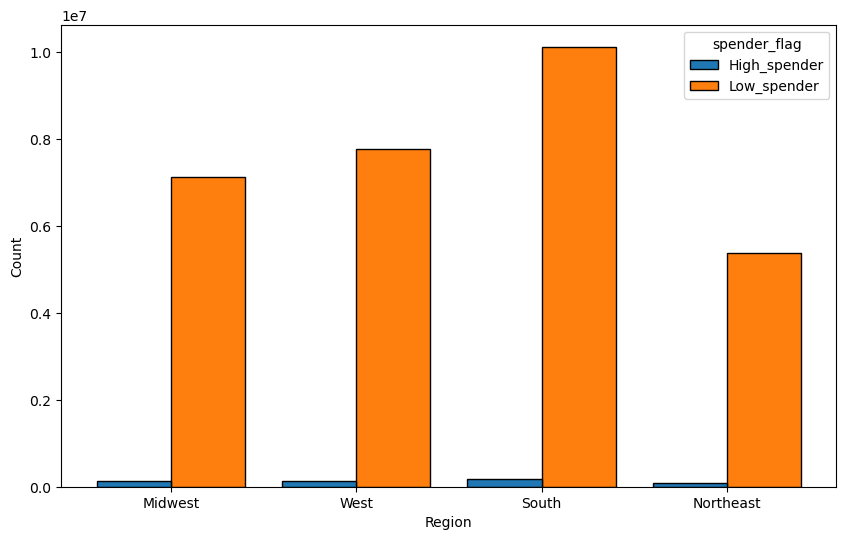

In [159]:
# A histogram could work to show the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
plt = sns.histplot(data=df_active, x='Region', hue='spender_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.show()

In [177]:
#Exporting the visualization 
plt.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'incomebyregion.png'))

## 8.2. Age Groups

AttributeError: 'Axes' object has no attribute 'gca'

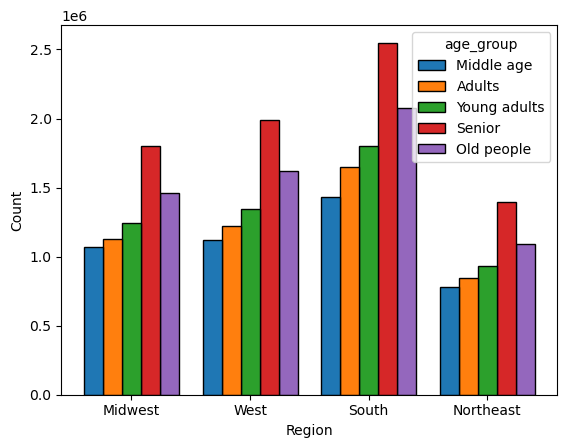

In [173]:

# Plot the histogram bars
age_plt= sns.histplot(data=df_active, x='Region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.show()

In [179]:
#Exporting the visualization 
age_plt.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'agebyregion.png'))

## 8.3 Department groups

In [185]:
# Creating crosstab for region and department
region_dep = pd.crosstab(df_active['department_id'], df_active['Region'], dropna = False)

In [187]:
# Checking Crosstab
region_dep

Region,Midwest,Northeast,South,West
department_id,,,,
1,498225,370436,709906,543164
2,7983,6268,11579,8581
3,261753,199300,371620,288155
4,2134115,1593004,3027476,2324678
5,34043,25017,48813,36754
6,60666,44678,84649,65998
7,598979,462929,859419,650574
8,21358,17734,29909,24059
9,193463,143817,272813,212043


AttributeError: 'Axes' object has no attribute 'gca'

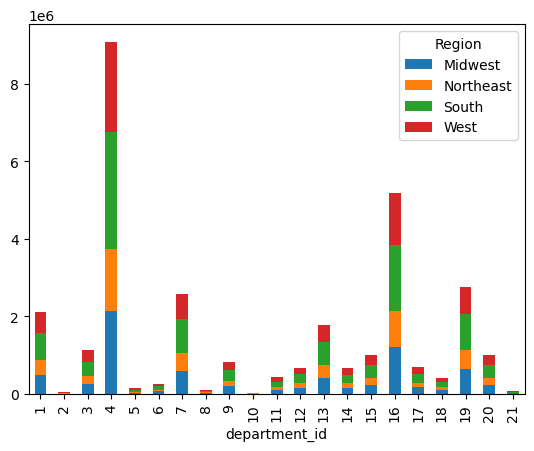

In [189]:
# Region_department Bar Chart
bar_dep = region_dep.plot(kind='bar', stacked =True)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Region')
plt.xlabel('Department')



In [193]:
# Exporting bar chart
bar_dep.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_department.png'))


## 8.4. Dependants

TypeError: 'Text' object is not callable

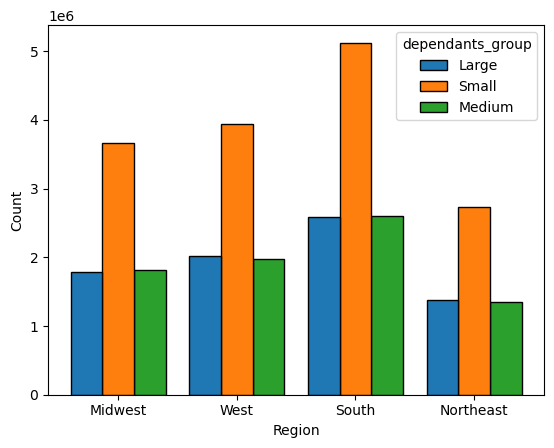

In [203]:

# Plot the histogram bars
dep_reg = sns.histplot(data=df_active, x='Region', hue='dependants_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependents by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.show()

In [205]:
# Exporting bar chart
dep_reg.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_dependents.png'))

# 9. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

*The frequency of usage is evaluated by examining the number of days since the previous order, while spending patterns are assessed using price data. To ensure accuracy, the data is aggregated so that each row corresponds to a single order from the Instacart DataFrame. This method prevents the distortion of averages caused by orders containing multiple items*

## 9.1 Aggregations by Age Group

In [238]:
# max, min, mean by age category
aggregations_by_age_cat = df_active.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                 'prices' : ['min', 'mean', 'max']})
# Check
aggregations_by_age_cat

days_since_prior_order                  prices                   
                                min       mean   max    min      mean      max
age_group                                                                     
Adults                          0.0  10.806437  30.0    1.0  9.594419  14900.0
Middle age                      0.0  10.790315  30.0    1.0  9.930235  14900.0
Old people                      0.0  10.861154  30.0    1.0  9.751006  14900.0
Senior                          0.0  10.795571  30.0    1.0  9.836302  14900.0
Young adults                    0.0  10.815433  30.0    1.0  9.938612  14900.0

#### Insights: 
* Ordering frequency is stable and uniform across age groups, with all making purchases roughly every 10 to 11 days.
* Average spending is slightly higher for middle-aged and young adults, but overall, spending behavior is relatively consistent across all age groups.
* Extreme high-value purchases (reflected in the max prices) are likely outliers and may not be representative of typical consumer behavior.

## 9.2 Aggregations by Income Group

In [243]:
# max, min, mean by age category
aggregations_by_income_cat = df_active.groupby('spender_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'prices' : ['min', 'mean', 'max']})
# Check
aggregations_by_income_cat

C:\Users\hp\AppData\Local\Temp\ipykernel_17504\611641061.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregations_by_income_cat = df_active.groupby('spender_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],


days_since_prior_order                  prices              \
                                min       mean   max    min        mean   
spender_flag                                                              
High_spender                    0.0  10.532807  30.0    1.0  123.185745   
Low_spender                     0.0  10.815306  30.0    1.0    7.781922   

                       
                  max  
spender_flag           
High_spender  14900.0  
Low_spender      25.0

#### Insights:
* Ordering frequency is similar between high and low spenders, with both groups placing orders about every 10-11 days.
* High spenders spend significantly more on their purchases, with an average price that is over 15 times higher than low spenders.
* Low spenders make smaller, more modest purchases, reflected by their much lower average and maximum prices. High spenders' behavior is likely driven by larger or more expensive purchases.
  
**This suggests that while high spenders may not order more frequently, their orders are of much higher value, making them a valuable customer segment for businesses to focus on.**

## 9.3 Aggregations by Dependants Category

In [254]:
# max, min, mean by dependents category
aggregations_by_dependents_cat = df_active.groupby('dependants_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                               'prices' : ['min', 'mean', 'max']})
# Check
aggregations_by_dependents_cat

days_since_prior_order                  prices             \
                                    min       mean   max    min       mean   
dependants_group                                                             
Large                               0.0  10.816218  30.0    1.0   9.810483   
Medium                              0.0  10.830972  30.0    1.0  10.021769   
Small                               0.0  10.796971  30.0    1.0   9.727171   

                           
                      max  
dependants_group           
Large             14900.0  
Medium            14900.0  
Small             14900.0

#### Insights: 
* Ordering frequency is very consistent across all dependants groups, with all groups making orders roughly every 10-11 days, regardless of family size.
* The Medium dependants group tends to spend slightly more on average per item, but the difference between the groups is not large.
* The presence of high-value outliers (maximum prices) is uniform across all groups, indicating that extreme high-priced items are not tied to family size.
  
**Overall, family size (or number of dependants) does not seem to significantly impact either the frequency of orders or the average spending behavior, though the Medium group exhibits a slightly higher average expenditure per item.**